In [1]:
%pip install unidecode

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os 
from unidecode import unidecode
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

dataset_path = "C:\\Users\\plopp\\Python\\PlayerPositions\\dataset\\players_15.csv"
data = pd.read_csv(dataset_path, encoding='utf-8')

In [3]:
# make the 
def print_columns(cols):
    count = 0
    for i in cols:
        count += 1
        print(i, end=", ", flush=True)
        if count == 6:
            count = 0
            print("")

In [4]:
print_columns(data.columns)

sofifa_id, player_url, short_name, long_name, age, dob, 
height_cm, weight_kg, nationality, club, overall, potential, 
value_eur, wage_eur, player_positions, preferred_foot, international_reputation, weak_foot, 
skill_moves, work_rate, body_type, real_face, release_clause_eur, player_tags, 
team_position, team_jersey_number, loaned_from, joined, contract_valid_until, nation_position, 
nation_jersey_number, pace, shooting, passing, dribbling, defending, 
physic, gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, 
gk_positioning, player_traits, attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, 
attacking_volleys, skill_dribbling, skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, 
movement_acceleration, movement_sprint_speed, movement_agility, movement_reactions, movement_balance, power_shot_power, 
power_jumping, power_stamina, power_strength, power_long_shots, mentality_aggression, mentality_interceptions, 
mental

In [5]:
# remove unneccessary columns 
for i, j in enumerate(data.columns):
    if i >= len(data.columns) - 26:
        data = data.drop(j, axis=1)

# remove irrelevant or missing value columns 
data.drop(columns=['sofifa_id', 'player_url', 'long_name', 'short_name','age', 'dob', 'nationality', 
                    'player_traits','club', 'potential', 'overall', 'value_eur', 'wage_eur', 'real_face', 
                  'team_jersey_number', 'loaned_from', 'joined', 'international_reputation', 'player_tags',
                  'contract_valid_until', 'nation_position', 'nation_jersey_number', 'mentality_composure',
                   'team_position', 'weak_foot', 'preferred_foot', 'skill_moves', 'work_rate', 'body_type',
                   'release_clause_eur', "weight_kg", "height_cm"], inplace=True)

In [6]:
def safe_eval(x):
    try:
        return eval(x)
    except:
        return x  # Return original value if eval fails

In [7]:
# replace short names with ascii names
data = data.applymap(lambda x: unidecode(str(x)) if isinstance(x, str) else x)

# get only last names
data['player_positions'] = data['player_positions'].apply(lambda x: str(x).split(',')[0] if isinstance(x, str) else x)
data = data.applymap(lambda x: safe_eval(x) if isinstance(x, str) else x)

In [8]:
# fill missing stats of face card values for players
gk_columns = [col for col in data.columns if 'gk' in col]
goalkeeping_columns = [col for col in data.columns if 'goalkeeping' in col]
gk_columns.remove('gk_speed')
goalkeeping_columns.remove('goalkeeping_positioning')
for i, j in zip(gk_columns, goalkeeping_columns):
    data[i].fillna(data[j], inplace=True)

data['gk_speed'] = data['movement_acceleration']
data['gk_positioning'] = data['goalkeeping_positioning']

# give gks stats for a card
data['pace'].fillna(round((data['movement_acceleration'] + data['movement_sprint_speed'] + data['movement_agility']) / 3), inplace=True)
data['shooting'].fillna(round((data['attacking_finishing'] + data['power_long_shots'] +  data['power_shot_power']) / 4), inplace=True)
data['passing'].fillna(round((data['mentality_vision'] + data['attacking_crossing'] + data['skill_long_passing'] + data['attacking_short_passing']) / 4), inplace=True)
data['dribbling'].fillna(round((data['skill_ball_control'] + data['skill_dribbling'] + data['movement_agility']) / 3), inplace=True)
data['defending'].fillna(round((data['mentality_aggression'] + data['defending_marking'] + data['defending_standing_tackle'] + data['defending_sliding_tackle']) / 4), inplace=True)
data['physic'].fillna(round((data['power_stamina'] + data['power_strength'] + data['power_jumping']) / 2), inplace=True)

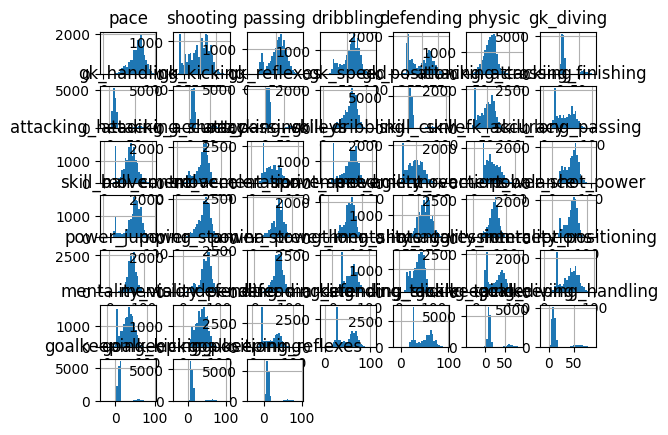

In [9]:
data.hist(bins=30)
plt.show()

In [10]:
np.random.seed(42)

In [11]:
encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(data[['player_positions']])
encoded_column = encoder.get_feature_names_out(['player_positions'])
# Convert to DataFrame with proper column names
labels = pd.DataFrame(encoded_data, columns=encoded_column)

In [12]:
new_data = data.drop('player_positions', axis=1)

In [13]:
train_set, test_set, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

In [15]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.45263498221791143


In [16]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.5476883284836728

Remove face card values and see if predicition accuracy goes up

In [17]:
print_columns(new_data.columns)

pace, shooting, passing, dribbling, defending, physic, 
gk_diving, gk_handling, gk_kicking, gk_reflexes, gk_speed, gk_positioning, 
attacking_crossing, attacking_finishing, attacking_heading_accuracy, attacking_short_passing, attacking_volleys, skill_dribbling, 
skill_curve, skill_fk_accuracy, skill_long_passing, skill_ball_control, movement_acceleration, movement_sprint_speed, 
movement_agility, movement_reactions, movement_balance, power_shot_power, power_jumping, power_stamina, 
power_strength, power_long_shots, mentality_aggression, mentality_interceptions, mentality_positioning, mentality_vision, 
mentality_penalties, defending_marking, defending_standing_tackle, defending_sliding_tackle, goalkeeping_diving, goalkeeping_handling, 
goalkeeping_kicking, goalkeeping_positioning, goalkeeping_reflexes, 

In [18]:
new_data.drop(columns=gk_columns, inplace=True)
new_data.drop(columns=["pace", "shooting", "passing", "dribbling", "defending", "physic", "gk_speed"])
new_data.head()

,pace,shooting,passing,dribbling,defending,physic,gk_speed,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,93.0,89.0,86.0,96.0,27.0,63.0,96,84,91,71,...,90,76,25,21,20,6,11,15,14,8
1,93.0,93.0,81.0,91.0,32.0,79.0,91,83,98,86,...,81,85,22,31,23,7,11,15,14,11
2,93.0,86.0,83.0,92.0,32.0,64.0,93,80,87,50,...,86,81,29,28,27,10,8,11,5,15
3,76.0,91.0,81.0,86.0,34.0,86.0,76,76,91,76,...,82,91,25,33,27,13,15,10,9,12
4,60.0,23.0,32.0,34.0,27.0,110.0,66,25,25,25,...,20,37,25,25,25,87,88,92,96,86


In [19]:
train_set, test_set, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

In [20]:
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

In [21]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.5473650177820886

In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4633042353701908


Change positions to be more normalised ie LW to LM CF to ST RW to RM and so on


In [23]:
def pos_change(pos):
    if pos == "CF":
        return "ST"
    elif "W" in pos:
        pos = pos.replace("W", "")
        if len(pos) == 1:
            return pos + "M"
        else:
            return pos
    elif "C" in pos and "M" in pos:
        return "CM"
    return pos

In [24]:
data['player_positions'] = data['player_positions'].apply(pos_change)
data.head()

,player_positions,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,ST,93.0,89.0,86.0,96.0,27.0,63.0,6.0,11.0,15.0,...,90,76,25,21,20,6,11,15,14,8
1,LM,93.0,93.0,81.0,91.0,32.0,79.0,7.0,11.0,15.0,...,81,85,22,31,23,7,11,15,14,11
2,RM,93.0,86.0,83.0,92.0,32.0,64.0,10.0,8.0,11.0,...,86,81,29,28,27,10,8,11,5,15
3,ST,76.0,91.0,81.0,86.0,34.0,86.0,13.0,15.0,10.0,...,82,91,25,33,27,13,15,10,9,12
4,GK,60.0,23.0,32.0,34.0,27.0,110.0,87.0,85.0,92.0,...,20,37,25,25,25,87,88,92,96,86


In [25]:
encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(data[['player_positions']])
encoded_column = encoder.get_feature_names_out(['player_positions'])
# Convert to DataFrame with proper column names
labels = pd.DataFrame(encoded_data, columns=encoded_column)

In [26]:
new_data = data.drop('player_positions', axis=1)

In [27]:
train_set, test_set, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

In [29]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.6534109279017135

In [30]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.5780795344325897

In [31]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.6534109279017135

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.581312641448432


Removing face card values to see if there is any noticeable 

In [33]:
new_data.drop(columns=gk_columns, inplace=True)
new_data.drop(columns=["pace", "shooting", "passing", "dribbling", "defending", "physic", "gk_speed"])
new_data.head()

,pace,shooting,passing,dribbling,defending,physic,gk_speed,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,93.0,89.0,86.0,96.0,27.0,63.0,96,84,91,71,...,90,76,25,21,20,6,11,15,14,8
1,93.0,93.0,81.0,91.0,32.0,79.0,91,83,98,86,...,81,85,22,31,23,7,11,15,14,11
2,93.0,86.0,83.0,92.0,32.0,64.0,93,80,87,50,...,86,81,29,28,27,10,8,11,5,15
3,76.0,91.0,81.0,86.0,34.0,86.0,76,76,91,76,...,82,91,25,33,27,13,15,10,9,12
4,60.0,23.0,32.0,34.0,27.0,110.0,66,25,25,25,...,20,37,25,25,25,87,88,92,96,86


In [34]:
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

In [35]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.6534109279017135

In [36]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.581312641448432


Changing positions to be goalkeeper, defender, midfielder, attacker


In [37]:
def pos_change(pos):
    if pos in ["CF", "ST", "LW", "RW"]:
        return "AT"
    elif pos in ["LM", "RM", "CAM", "CDM", "CM"]:
        return "MF"
    elif pos in ["CB", "RB", "LB", "RCB", "LCB", "RWB", "LWB"]:
        return "CM"
    return "GK"

In [38]:
data['player_positions'] = data['player_positions'].apply(pos_change)


In [39]:
encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(data[['player_positions']])
encoded_column = encoder.get_feature_names_out(['player_positions'])
# Convert to DataFrame with proper column names
labels = pd.DataFrame(encoded_data, columns=encoded_column)

In [40]:
new_data = data.drop('player_positions', axis=1)

In [41]:
train_set, test_set, train_labels, test_labels = train_test_split(new_data, labels, test_size=0.2, random_state=42)

In [42]:
scaler = StandardScaler()
train_set = scaler.fit_transform(train_set)
test_set = scaler.transform(test_set)

In [43]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.9004203039120595

In [44]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.8470740381506627

In [45]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.8849013902360168

In [46]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.8745554477853217

In [47]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.9085030714516651

In [48]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.882314904623343

In [49]:
clf = KNeighborsClassifier(n_neighbors=9)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.9036534109279017

In [50]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9149692854833495


Now for testing against the other datasets and see if the model can predict the other FIFA games

In [ ]:
from pandas.errors import MergeError
all_data = pd.DataFrame()
for i in os.listdir("dataset"):
    # already trained on this data 
    if i == "players_15.csv": continue
    path = "dataset/" + i
    data = pd.read_csv(path, encoding='utf-8')
    # remove unneccessary columns 
    for i, j in enumerate(data.columns):
        if i >= len(data.columns) - 26:
            data = data.drop(j, axis=1)

    # remove irrelevant or missing value columns 
    data.drop(columns=['sofifa_id', 'player_url', 'long_name', 'short_name','age', 'dob', 'nationality', 
                    'player_traits','club', 'potential', 'overall', 'value_eur', 'wage_eur', 'real_face', 
                  'team_jersey_number', 'loaned_from', 'joined', 'international_reputation', 'player_tags',
                  'contract_valid_until', 'nation_position', 'nation_jersey_number', 'mentality_composure',
                   'team_position', 'weak_foot', 'preferred_foot', 'skill_moves', 'work_rate', 'body_type',
                   'release_clause_eur', "weight_kg", "height_cm"], inplace=True)
    # replace short names with ascii names
    data = data.applymap(lambda x: unidecode(str(x)) if isinstance(x, str) else x)

    # get only last names
    data['player_positions'] = data['player_positions'].apply(lambda x: str(x).split(',')[0] if isinstance(x, str) else x)
    data = data.applymap(lambda x: safe_eval(x) if isinstance(x, str) else x)
    try:
        pd.merge(all_data, data)
    except MergeError:
        all_data = data

all_data.head

<bound method NDFrame.head of       player_positions  pace  shooting  passing  dribbling  defending  physic  \
0                   RW  92.0      88.0     86.0       95.0       24.0    62.0   
1                   LW  92.0      93.0     80.0       91.0       33.0    78.0   
2                   RM  92.0      86.0     82.0       92.0       32.0    64.0   
3                   GK   NaN       NaN      NaN        NaN        NaN     NaN   
4                   ST  83.0      88.0     79.0       87.0       42.0    79.0   
...                ...   ...       ...      ...        ...        ...     ...   
14876               CM  63.0      40.0     43.0       47.0       39.0    52.0   
14877               CM  69.0      34.0     44.0       49.0       32.0    46.0   
14878               GK   NaN       NaN      NaN        NaN        NaN     NaN   
14879               LB  58.0      28.0     32.0       45.0       43.0    45.0   
14880               GK   NaN       NaN      NaN        NaN        NaN     NaN  

In [52]:
# change all_data to be just data so I can reuse code
data = all_data

In [53]:
# fill missing stats of face card values for players
gk_columns = [col for col in data.columns if 'gk' in col]
goalkeeping_columns = [col for col in data.columns if 'goalkeeping' in col]
gk_columns.remove('gk_speed')
goalkeeping_columns.remove('goalkeeping_positioning')
for i, j in zip(gk_columns, goalkeeping_columns):
    data[i].fillna(data[j], inplace=True)

data['gk_speed'] = data['movement_acceleration']
data['gk_positioning'] = data['goalkeeping_positioning']

# give gks stats for a card
data['pace'].fillna(round((data['movement_acceleration'] + data['movement_sprint_speed'] + data['movement_agility']) / 3), inplace=True)
data['shooting'].fillna(round((data['attacking_finishing'] + data['power_long_shots'] +  data['power_shot_power']) / 4), inplace=True)
data['passing'].fillna(round((data['mentality_vision'] + data['attacking_crossing'] + data['skill_long_passing'] + data['attacking_short_passing']) / 4), inplace=True)
data['dribbling'].fillna(round((data['skill_ball_control'] + data['skill_dribbling'] + data['movement_agility']) / 3), inplace=True)
data['defending'].fillna(round((data['mentality_aggression'] + data['defending_marking'] + data['defending_standing_tackle'] + data['defending_sliding_tackle']) / 4), inplace=True)
data['physic'].fillna(round((data['power_stamina'] + data['power_strength'] + data['power_jumping']) / 2), inplace=True)

In [54]:
data['player_positions'] = data['player_positions'].apply(pos_change)

In [55]:
encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(data[['player_positions']])
encoded_column = encoder.get_feature_names_out(['player_positions'])
# Convert to DataFrame with proper column names
labels = pd.DataFrame(encoded_data, columns=encoded_column)

In [56]:
new_data = data.drop("player_positions", axis=1)

In [58]:
scaler = StandardScaler()
new_data = scaler.fit_transform(new_data)

In [59]:
clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(train_set, train_labels)

y_pred = clf.predict(test_set)
accuracy = accuracy_score(test_labels, y_pred)
accuracy

0.9085030714516651

In [61]:
pred = clf.predict(new_data)
accuracy = accuracy_score(labels, pred)
accuracy

0.8793763859955648

87% success rate in predicting player positions in Attack, Defence, Midfield and Goalkeeper